In [23]:
#Import Libraries
from generate_data_class import GenerateData
import genetic_algo_gs as gag
import kmeans
import numpy
import itertools

Step 1: Generate sample data

In [24]:
#Inputs
kNo = 3

#Generate Data
gy = GenerateData(kNo)
rawData = gy.raw_data()

In [25]:
def kmean_data(data):
    l = []
    for el in data:
        l2 = []
        l2.append(el[0][0])
        l2.append(el[1][0])
        l.append(numpy.array(l2))

    return numpy.array(l)

Step 2: Perform K-Means

c:\Users\paras\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\paras\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Algorithm converged after 8 iterations.
Fitness value of K-Means output is: 0.00003728


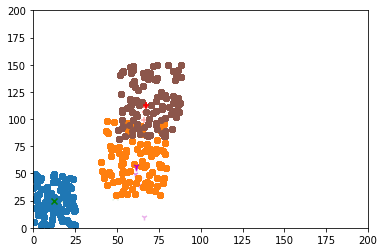

In [26]:
model = kmeans.KMeans(kNo)
data1 = kmean_data(rawData)
model.fit(data1,False,True)
ml = model.to__solution()
print(f'Fitness value of K-Means output is: {gag.fitness_func(numpy.array([ml]))[0]:0.8f}')

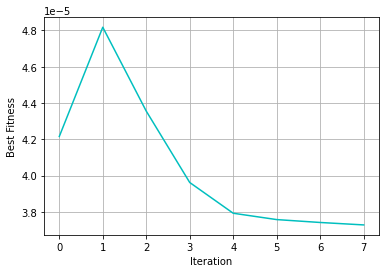

In [27]:
ko = model.evolution
lp = []
kmean_fitness_list = []
ti = []
for el in ko: 
    yo = []   
    for subel in el:
        yo.append(subel[0])
        yo.append(subel[1])
    ti.append(numpy.array(yo))
ti = numpy.array(ti)

io = gag.fitness_func(ti)
gag.display_plot(io.tolist())

Step 3: Get best centroid list from K-Means and feed to GA

In [28]:
data_for_GA = []
for ty in model.evolution[-1]:
    data_for_GA.append(ty[0])
    data_for_GA.append(ty[1])
print(data_for_GA)

[67.52031004122449, 112.9412613516517, 12.4440507768064, 24.997763234594508, 61.28800800430562, 56.84923586541724]


Step 4: Calculate fitness of kmeans solution and run GA Algorithm

In [29]:
initial_centroids = gag.init_cluster_center(kNo,data_for_GA)
fit_func = gag.fitness_func(initial_centroids)

In [39]:
_, plot_result, _, _,centroidList = gag.GeneticAlgorithm(gag.fitness_func,kNo,500,dataCen=data_for_GA)

Generation #-1   |fitness: 0.0000373 |Centroid = [ 67.52031004 112.94126135  12.44405078  24.99776323  61.288008
  56.84923587]
Generation #0   |fitness: 0.0000373 |Centroid = [ 67.52031004 112.94126135  12.44405078  24.99776323  61.288008
  57.98622058]
Generation #1   |fitness: 0.0000373 |Centroid = [ 67.52031004 112.94126135  12.44405078  24.99776323  61.288008
  57.98622058]
Generation #2   |fitness: 0.0000375 |Centroid = [ 67.52031004 112.94126135  13.44405078  24.99776323  61.288008
  57.98622058]
Generation #3   |fitness: 0.0000375 |Centroid = [ 67.52031004 112.94126135  13.44405078  24.99776323  62.288008
  57.98622058]
Generation #4   |fitness: 0.0000376 |Centroid = [ 68.52031004 112.94126135  13.44405078  25.24774087  62.90088808
  57.98622058]
Generation #5   |fitness: 0.0000376 |Centroid = [ 68.52031004 112.94126135  13.44405078  25.24774087  61.288008
  58.98622058]
Generation #6   |fitness: 0.0000376 |Centroid = [ 68.52031004 112.94126135  13.44405078  24.99776323  63.900

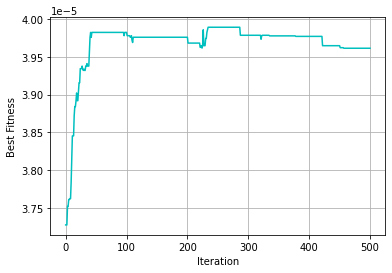

In [40]:
gag.display_plot(plot_result)

In [41]:
max(plot_result)

3.988943774943633e-05

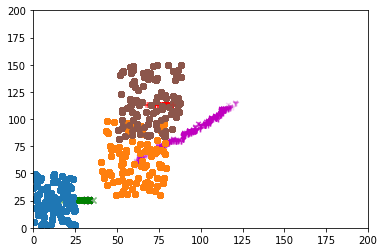

In [42]:
alphas = itertools.cycle(list(numpy.arange(0.1,1,1/500)))
for e in centroidList:
    kmeans.plot_resV3(data1,e,alpha = next(alphas),marker="x",nb_clusters=kNo)